In [1]:
# from sklearn.datasets import make_blobs
# from matplotlib import pyplot
# from pandas import DataFrame

# # generate 2d classification dataset
# X_train1, y_train1 = make_blobs(n_samples=1000, centers=2, n_features=2, shuffle=True, random_state=12)
# # scatter plot, dots colored by class value
# train1 = DataFrame(dict(x=X_train1[:,0], y=X_train1[:,1], label=y_train1))
# colors = {0:'red', 1:'blue'}
# fig, ax = pyplot.subplots()
# grouped = train1.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# pyplot.show()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.metrics import confusion_matrix,classification_report

In [3]:

X = np.random.uniform(-1, 10, size = (200,2));
np.random.seed(0)

n1,n2 = 100,100
n = n1+n2

X1 = np.random.normal([4,6], 0.5, (n1, 2))
X2 = np.random.normal([-1,1], 0.5, (n2, 2))

X = np.concatenate((X1,X2))
np.random.shuffle(X)

Y = 1*np.logical_xor(X[:, 0] > 0 , X[:, 1] > 0)
Y[Y==0] = -1

noiseLevel = 0.6
noise = noiseLevel * np.random.randn(n, 2)
X +=noise 

In [4]:
# X = np.random.uniform(-3, 4, size = (200,3));

# n1,n2 = 200,200
# n = n1+n2

# X1 = np.random.normal([2,4], 1, (n1, 2))
# X2 = np.random.normal([10,-1], 1, (n2, 2))

# X = np.concatenate((X1,X2))
# np.random.shuffle(X)

# Y = 1*np.logical_xor(X[:, 0] > 0 , X[:, 1] > 0)
# Y[Y==0] = -1

# noiseLevel = 0.6
# noise = noiseLevel * np.random.randn(n, 2)
# X +=noise 

In [5]:
df_dict = {"X1":X[:,0], "X2":X[:,1],"Y":Y}

df = pd.DataFrame(df_dict)
df.head()

,X1,X2,Y
0,5.107011,4.854087,-1
1,-0.930363,-0.050416,1
2,4.001498,6.351039,-1
3,2.997893,5.496348,-1
4,4.593971,5.073170,-1


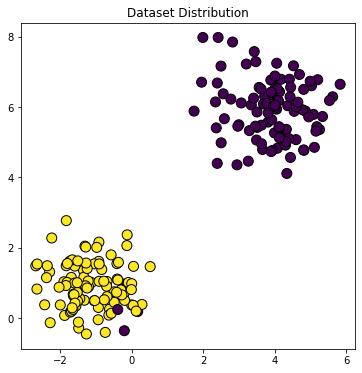

In [6]:
plt.figure(1, figsize=(6,6)) 
plt.title('Dataset Distribution')
plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, edgecolors='k')
plt.show()

In [7]:
#find best degree

kfold=10
best_degree = 1
best_score = 0
scores = []

for i in range(1,10):
    svm_classifier = SVC(kernel="poly",degree=i)
    svmScores = cross_val_score(svm_classifier, X, Y.ravel(), cv=kfold, scoring="accuracy")
    score = statistics.mean(svmScores)
    scores.append(score)
    
    if score > best_score:
        best_score=score
        best_degree=i
    print('Average accuracy in 10- fold cross-validation for SVM with degree',i , ' is ', score)

print("\n\nBest degree is",best_degree," with score ",best_score)

Average accuracy in 10- fold cross-validation for SVM with degree 1  is  0.98
Average accuracy in 10- fold cross-validation for SVM with degree 2  is  0.98
Average accuracy in 10- fold cross-validation for SVM with degree 3  is  0.98
Average accuracy in 10- fold cross-validation for SVM with degree 4  is  0.98
Average accuracy in 10- fold cross-validation for SVM with degree 5  is  0.98
Average accuracy in 10- fold cross-validation for SVM with degree 6  is  0.98
Average accuracy in 10- fold cross-validation for SVM with degree 7  is  0.98
Average accuracy in 10- fold cross-validation for SVM with degree 8  is  0.98
Average accuracy in 10- fold cross-validation for SVM with degree 9  is  0.98


Best degree is 1  with score  0.98


In [8]:
#find optimum C

scores = []
best_C = 1
best_score = 0
rangeC = 1000
for c in range(1,rangeC):
    svm_classifier = SVC(kernel="poly",degree=best_degree,C=c/100)
    svmScores = cross_val_score(svm_classifier, X, Y.ravel(), cv=kfold, scoring="accuracy")
    score = statistics.mean(svmScores)
    scores.append(score)
    if score > best_score:
        best_score=score
        best_C=c/100
    #print('Average accuracy in 10- fold cross-validation for SVM with degree',best_degree ,"and C",c, ' is ', score)

print("\n\nBest C is",best_C," with score ",best_score)



Best C is 0.01  with score  0.98


NameError: name 'clf' is not defined

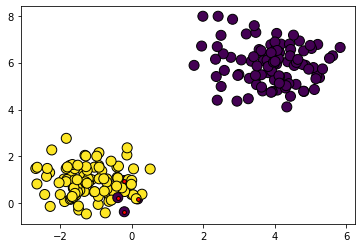

In [12]:
from sklearn import svm

# fit the model, don't regularize for illustration purposes
# clf = svm.SVC(kernel="linear", C=1000)
# clf.fit(X, Y)
svm_classifier = SVC(kernel="linear",degree=best_degree,C=best_C)
svm_classifier.fit(X,Y)
Y_hat = svm_classifier.predict(X)


# plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, edgecolors='k')

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


#show misclassification
wrong = (Y == Y_hat)
wrong = X[wrong==False]
ax.scatter(wrong[:,0], wrong[:,1], s=15,alpha = 1, linewidth=1, facecolors='red', edgecolors='k', label="misclassification")

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [ ]:
# svm_classifier = SVC(kernel="poly",degree=best_degree,C=best_C)
# svm_classifier.fit(X,Y)
# Y_hat = svm_classifier.predict(X)
# print(classification_report(Y,Y_hat))

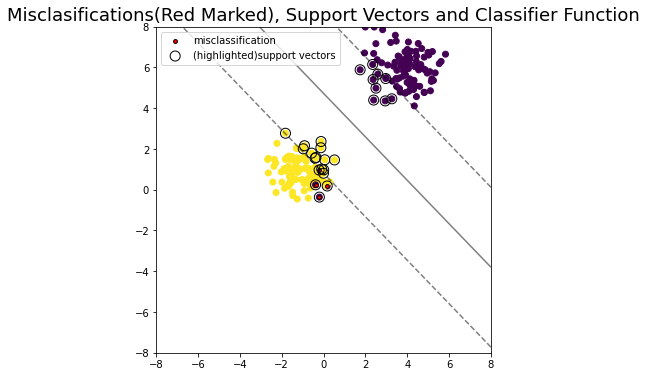

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

squareSpace = 8
xx, yy = np.meshgrid(np.linspace(-squareSpace, squareSpace, 500), np.linspace(-squareSpace, squareSpace, 500))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot the dataset
ax.scatter(X[:,0], X[:,1], c=Y)

#show misclassification
wrong = (Y == Y_hat)
wrong = X[wrong==False]
ax.scatter(wrong[:,0], wrong[:,1], s=15,alpha = 1, linewidth=1, facecolors='red', edgecolors='k', label="misclassification")

# Get the separating hyperplane
Z = svm_classifier.decision_function(xy).reshape(xx.shape)

# Draw the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

support_vecX1 = svm_classifier.support_vectors_[:, 0]
support_vecX2 = svm_classifier.support_vectors_[:, 1]
# Highlight support vectors with a circle around them
ax.scatter(support_vecX1, support_vecX2, s=100, linewidth=1, facecolors='none', edgecolors='k',label='(highlighted)support vectors')
plt.legend()
plt.title("Misclasifications(Red Marked), Support Vectors and Classifier Function",fontsize=18)
plt.show()